**1. Wczytanie bazy danych**

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('fatal-police-shootings-data.csv')
df.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


**2. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’)**

In [159]:
grouped_data = df.groupby(['race', 'signs_of_mental_illness']).size().reset_index(name='count')
grouped_data.head()

,race,signs_of_mental_illness,count
0,A,False,69
1,A,True,24
2,B,False,1114
3,B,True,184
4,H,False,745


**3. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji**

In [160]:
race_totals = grouped_data.groupby('race')['count'].sum().reset_index(name='total_count')

In [161]:
combined_data = grouped_data.merge(race_totals, on='race')

In [162]:
combined_data['percentage'] = combined_data.apply(
    lambda row: (row['count'] / row['total_count']) * 100 if row['signs_of_mental_illness'] else 0,
    axis=1
)

In [163]:
max_odsetek = combined_data.loc[combined_data['percentage'].idxmax()]
max_odsetek

race                               W
signs_of_mental_illness         True
count                            713
total_count                     2476
percentage                 28.796446
Name: 11, dtype: object

**4. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.**

In [164]:
df['date'] = pd.to_datetime(df['date'])  
df['day_of_week'] = df['date'].dt.day_name()
df.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


In [165]:
interventions_per_day = df.groupby('day_of_week').size().reset_index(name='count')

In [166]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
interventions_per_day['day_of_week'] = pd.Categorical(interventions_per_day['day_of_week'], categories=day_order, ordered=True)
interventions_per_day = interventions_per_day.sort_values('day_of_week')

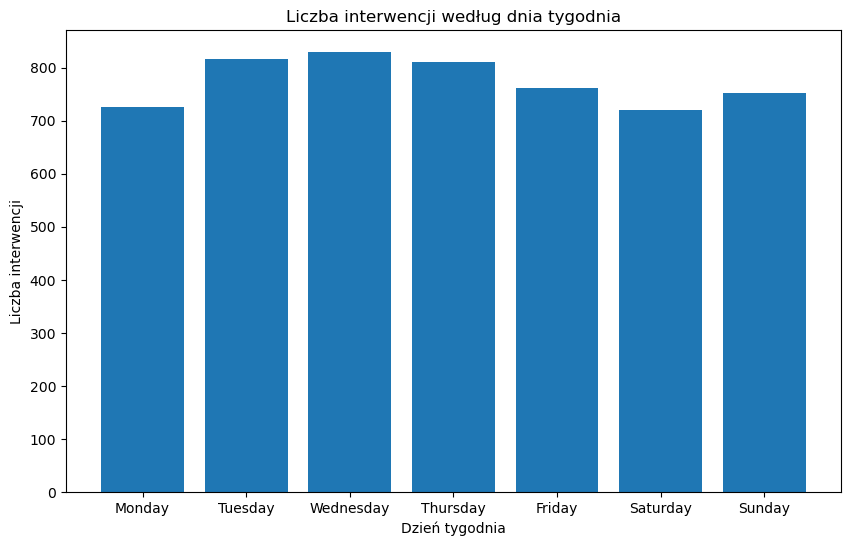

In [167]:
plt.figure(figsize=(10,6))
plt.bar(interventions_per_day['day_of_week'], interventions_per_day['count'])
plt.title('Liczba interwencji według dnia tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba interwencji')
plt.show()

**5.Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów**

In [168]:
population_data = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
population_df = population_data[0]  
population_df = population_df[['State', 'Census population, April 1, 2020 [1][2]']]
population_df.columns = ['State', 'Population']
population_df.head()

,State,Population
0,California,39538223
1,Texas,30145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700


In [169]:
state_codes = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
state_codes_df = state_codes[1]
state_codes_df = state_codes_df[['Name', 'USPS']] 
state_codes_df.columns = ['State', 'StateAbbr']
state_codes_df.head()

,State,StateAbbr
0,Name,NaN
1,United States of America,NaN
2,Alabama,AL
3,Alaska,AK
4,Arizona,AZ


In [170]:
merged_df = pd.merge(population_df, state_codes_df, on='State', how='left')
merged_df.head()

,State,Population,StateAbbr
0,California,39538223,CA
1,Texas,30145505,TX
2,Florida,21538187,FL
3,New York,20201249,NY
4,Pennsylvania,13002700,PA


In [171]:
incidents_by_state = df.groupby('state').size().reset_index(name='Incident_Count')
incidents_population = pd.merge(incidents_by_state, merged_df, left_on='state', right_on='StateAbbr', how='left')

In [172]:
incidents_population['Incidents_per_1000'] = (incidents_population['Incident_Count'] / incidents_population['Population']) * 1000

In [173]:
final_result = incidents_population[['State', 'Incident_Count', 'Population', 'Incidents_per_1000']]

In [174]:
print(final_result)

                   State  Incident_Count  Population  Incidents_per_1000
0                 Alaska              39      733391            0.053178
1                Alabama             104     5024279            0.020699
2               Arkansas              83     3011524            0.027561
3                Arizona             254     7151502            0.035517
4             California             799    39538223            0.020208
5               Colorado             195     5773714            0.033774
6            Connecticut              21     3605944            0.005824
7   District of Columbia              13      689545            0.018853
8               Delaware              13      989948            0.013132
9                Florida             350    21538187            0.016250
10               Georgia             182    10711908            0.016990
11                Hawaii              30     1455271            0.020615
12                  Iowa              32     319036